In [16]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go


def rotation(theta) :
    
    #Rotation matrix settings chosen according to this paper:
    #--> "Extraction and Tracking of MRI Tagging Sheets Using a 3D Gabor Filter Bank"
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         np.cos(theta[0]), -np.sin(theta[0]) ],
                    [0,         np.sin(theta[0]), np.cos(theta[0])  ]
                    ])
    
    R_y = np.array([[np.cos(theta[1]),    0,      np.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-np.sin(theta[1]),   0,      np.cos(theta[1])  ]
                    ])
                 
    R_z = np.array([[np.cos(theta[2]),    -np.sin(theta[2]),    0],
                    [np.sin(theta[2]),    np.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
                     
                     
    R = np.dot(R_z, np.dot( R_y, R_x ))
 
    return R


def gabor_fn(sigma, thetas, Lambda, psi, gamma, size, plot=False, slices=False):
    sigma_x = sigma
    sigma_y = float(sigma) / gamma
    sigma_z = float(sigma) / gamma

    # Bounding box
    (z, y, x) = np.meshgrid(np.arange(-size, size + 1), np.arange(-size, size + 1), np.arange(-size, size +1))
    
    # Rotation
    R = rotation(thetas) 
    z_prime = z * R[0,0] + y * R[0,1] + x * R[0,2]
    y_prime = z * R[1,0] + y * R[1,1] + x * R[1,2]
    x_prime = z * R[2,0] + y * R[2,1] + x * R[2,2]

    gb = np.exp(-.5 * (x_prime ** 2 / sigma_x ** 2 + y_prime ** 2 / sigma_y ** 2 + z_prime ** 2 / sigma_z)) * np.cos(2 * np.pi * x_prime / Lambda + psi)
        
    return gb


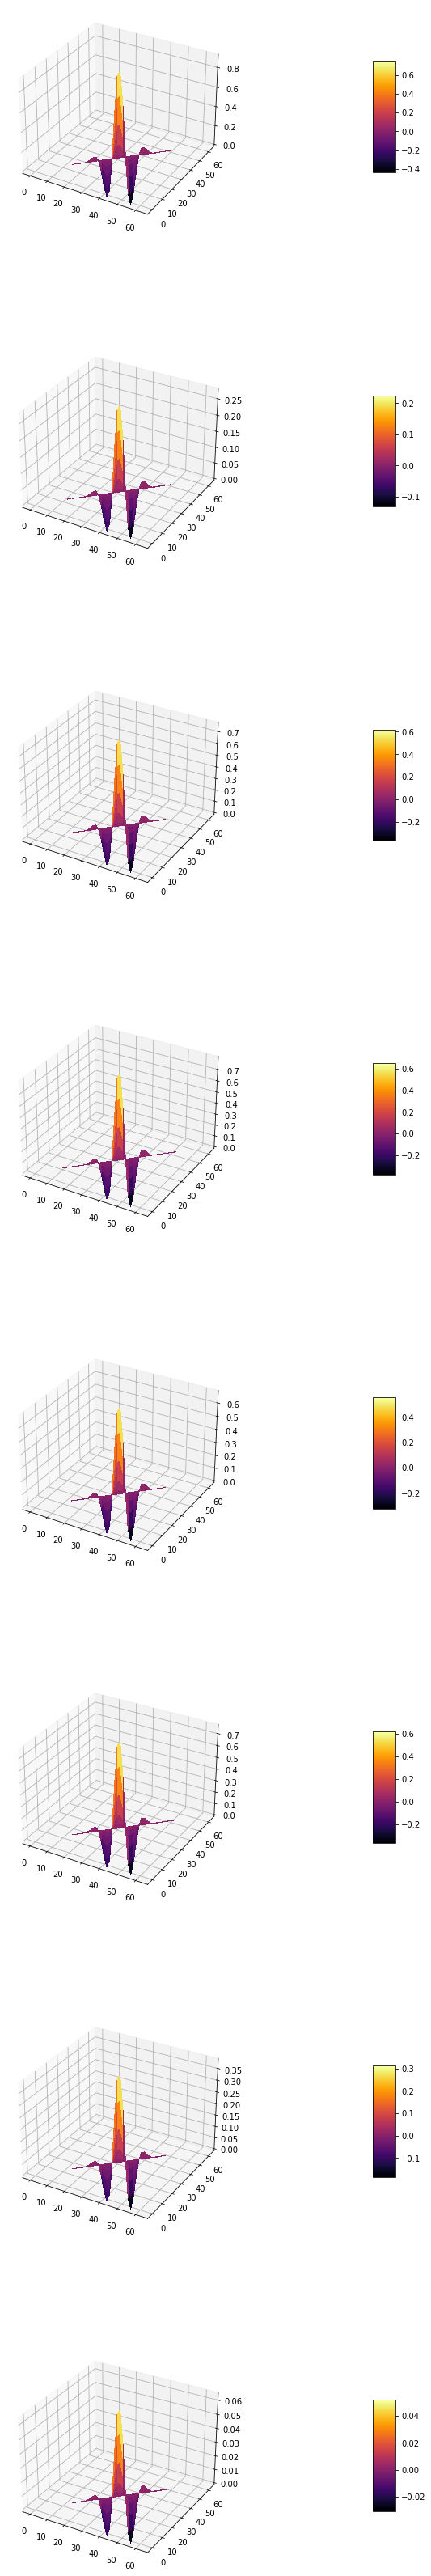

In [45]:
sigma = 4.0
Lambda = 10.0
psi = 0.3
gamma = 0.3
size = 31
theta_x = np.pi
theta_y = np.pi
theta_z = np.pi
thetas = [theta_x, theta_y, theta_z]
kern = gabor_fn(sigma, thetas, Lambda, psi, gamma, size)

#3D plotting
fig = plt.figure()
fig.set_size_inches(50, 50)

total_plots = 0

while True:
    ax = fig.add_subplot(9, 1, total_plots + 1,
                          projection='3d')
    
    slice_ = np.random.randint(low=2, high=kern.shape[2])
  
    # Data for a three-dimensional line
    X = np.arange(0, len(kern))
    Y = X

    # Plot the surface.
    surf = ax.plot_surface(X, Y, kern[slice_], cmap=cm.inferno,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, np.max(kern[slice_]))
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    total_plots +=1
    
    if total_plots ==8:
        break
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


In [18]:
#Defining Gabor filterbanks:
def filter_bank_gb3d(sigma=4.0, Lambda=10.0, psi=0.3, gamma=0.3, size=31, plot=False):
    filters = []
    sigma = sigma
    for theta_x in np.arange(0, np.pi, np.pi / 4):
        for theta_y in np.arange(0, np.pi, np.pi / 4):
            for theta_z in np.arange(0, np.pi, np.pi / 4):
                thetas = [theta_x, theta_y, theta_z]
                # print(thetas)
                kern = gabor_fn(sigma, thetas, Lambda, psi, gamma, size, plot=plot)
                kern /= 1.5*kern.sum()
                filters.append(np.transpose(kern))
                
    return filters

F = filter_bank_gb3d()

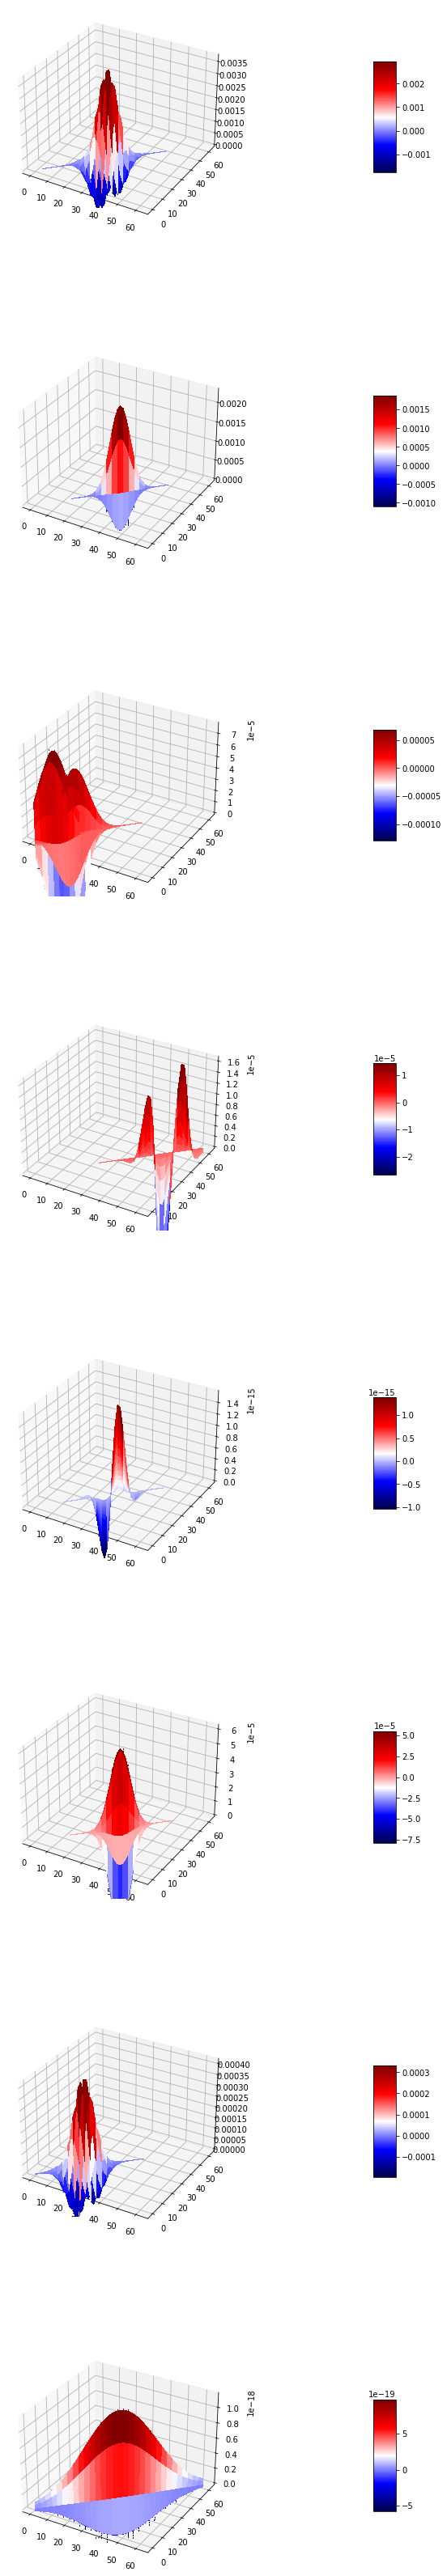

In [19]:
#Watching filters with different orientations
#3D plotting
fig = plt.figure()
fig.set_size_inches(50, 50)

total_plots = 0
np.random.seed(1)

while True:
    ax = fig.add_subplot(9, 1, total_plots + 1,
                          projection='3d')
    
    slice_ = np.random.randint(low=2, high=kern.shape[2])
    orientation_ = np.random.randint(low=2, high=kern.shape[2])
    # Data for a three-dimensional line
    X = np.arange(0, len(kern))
    Y = X

    # Plot the surface.
    surf = ax.plot_surface(X, Y, F[orientation_][slice_], cmap=cm.seismic,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, np.max(F[orientation_][slice_]))
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    total_plots +=1
    
    if total_plots ==8:
        break
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


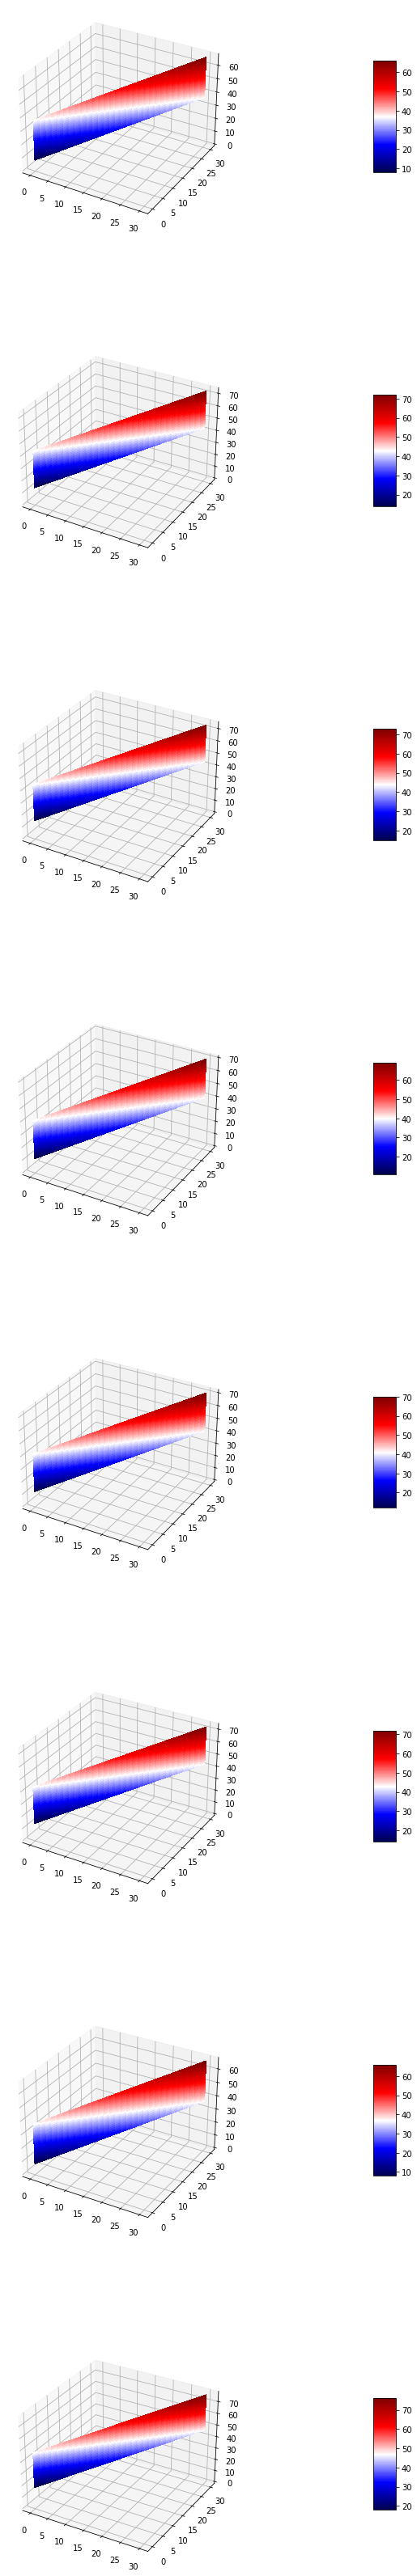

In [29]:
#Create a cube
side = 31
x = np.arange(0, side)
y = np.arange(0, side)
z = np.arange(0,side)
ym, zm, xm = np.meshgrid(y, z, x)

cube = xm + ym + zm

#Plotting IA, 
fig = plt.figure()
fig.set_size_inches(50, 50)

total_plots = 0
np.random.seed(1)

while True:
    ax = fig.add_subplot(9, 1, total_plots + 1,
                          projection='3d')
    
    slice_ = np.random.randint(low=2, high=cube.shape[2])
    #orientation_ = np.random.randint(low=2, high=cube.shape[2])
    # Data for a three-dimensional line
    X = np.arange(0, len(cube))
    Y = X

    # Plot the surface.
    surf = ax.plot_surface(X, Y, cube[slice_], cmap=cm.seismic,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, np.max(cube[slice_]))
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    total_plots +=1
    
    if total_plots ==8:
        break
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


In [50]:
def calculateAMFM_3D(img):
    X, Y, Z = img.shape
    #Calculation of the IA component
    IA = np.absolute(img)
    #Phase calculation
    IP = np.angle(img)
    #We normalize the IA
    IANorm = img / IA
    IFx = np.zeros((X,Y,Z))
    IFy = np.copy(IFx)
    IFz = np.copy(IFx)
    
    for i in np.arange(1, X-2):
        for j in np.arange(1, Y-2):
            for k in np.arange(1, Z-2):
                IFx[i, j, k] = np.abs(np.arccos(np.real((IANorm[i+2, j, k] + 
                                                         IANorm[i-1, j, k] +
                                                         IANorm[i-1, j, k]) /
                                                         (3 * IANorm[i, j, k]))))
                
                
                IFy[i, j, k] = np.abs(np.arccos(np.real((IANorm[i, j+2, k] + 
                                                         IANorm[i, j-1, k] +
                                                         IANorm[i, j-1, k]) /
                                                         (3 * IANorm[i, j, k]))))
                
                IFz[i, j, k] = np.abs(np.arccos(np.real((IANorm[i, j, k+2] + 
                                                         IANorm[i, j, k-1] +
                                                         IANorm[i, j, k-1]) /
                                                       (3 * IANorm[i, j, k]))))
                
    return IA, IP, IFx, IFy, IFz


from numpy.fft import fftn as fftn
from numpy.fft import ifftn as ifftn
from numpy.fft import fftshift as fftshift

#Apply
Iz = np.zeros((F[17].shape))
Iz[:side, :side, :side] = cube
result = ifftn(fftn(F[17]) * fftn(Iz))
                
IA, IP, IFx, IFy, IFz = calculateAMFM_3D(result)    

mag_IF = np.sqrt(IFx**2 + IFy**2 + IFz**2)
    

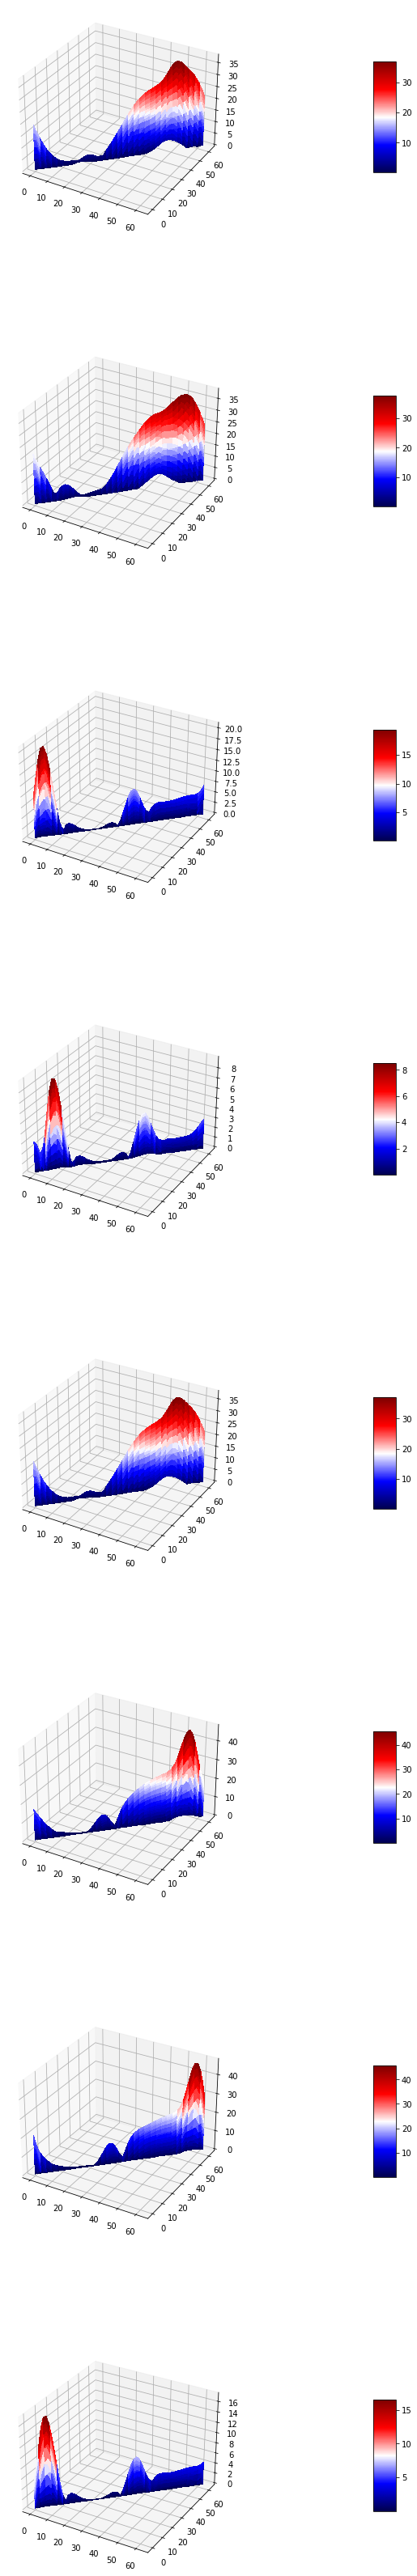

In [51]:
#Plotting IA, 
fig = plt.figure()
fig.set_size_inches(50, 50)

total_plots = 0
np.random.seed(2)

while True:
    ax = fig.add_subplot(9, 1, total_plots + 1,
                          projection='3d')
    
    slice_ = np.random.randint(low=2, high=IA.shape[2])
    orientation_ = np.random.randint(low=2, high=IA.shape[2])
    # Data for a three-dimensional line
    X = np.arange(0, len(IA))
    Y = X

    # Plot the surface.
    surf = ax.plot_surface(X, Y, IA[slice_], cmap=cm.seismic,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(0, np.max(IA[slice_]))
    #ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    #ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    total_plots +=1
    
    if total_plots ==8:
        break
    
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()


Text(0.5, 1.0, 'IA result of the cube')

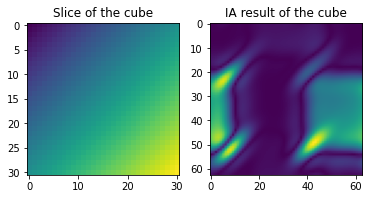

In [52]:
#We display 2D slices results of IA

f, ax = plt.subplots(1,2)
ax[0].imshow(cube[:,10,:])
ax[0].set_title("Slice of the cube")
ax[1].imshow(IA[:,10,:])
ax[1].set_title("IA result of the cube")